In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

This image is of type:  <class 'numpy.ndarray'>  With dimensions : (450, 660, 3)


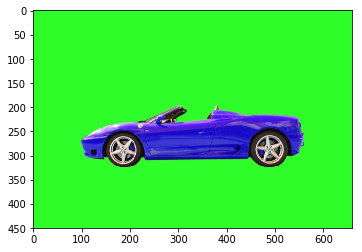

In [2]:
PATH = "images/car_green_screen.jpg"
image = cv2.imread(PATH)
print('This image is of type: ', type(image),
     ' With dimensions :', image.shape)
plt.imshow(image)

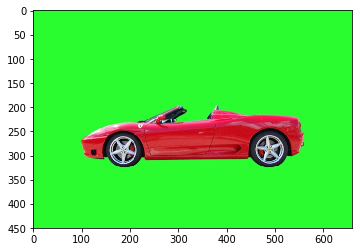

In [4]:
copied_image = np.copy(image)
copied_image = cv2.cvtColor(copied_image, cv2.COLOR_BGR2RGB)
plt.imshow(copied_image)

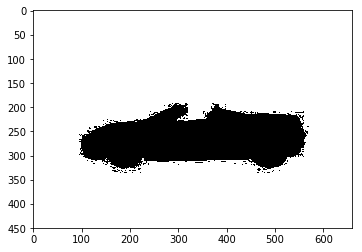

In [25]:
# Creating mask for image
lower_green = np.array([40, 230, 30])
upper_green = np.array([70, 255, 50])

mask = cv2.inRange(copied_image, lower_green, upper_green)
plt.imshow(mask, cmap='gray')

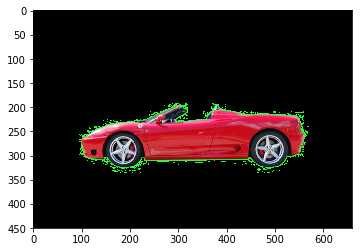

In [26]:
masked_image = np.copy(copied_image)
masked_image[mask != 0] = [0, 0, 0]
plt.imshow(masked_image)

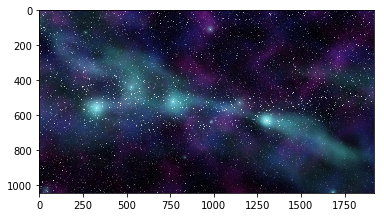

In [27]:
bg_image = cv2.imread("images/space_background.jpg")
bg_image = cv2.cvtColor(bg_image, cv2.COLOR_BGR2RGB)
plt.imshow(bg_image)

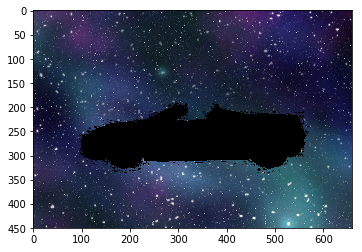

In [29]:
# Croping background and image to 450 * 660
crop_bg = bg_image[0:450, 0:660]
crop_bg[mask == 0] = [0, 0, 0]
plt.imshow(crop_bg)

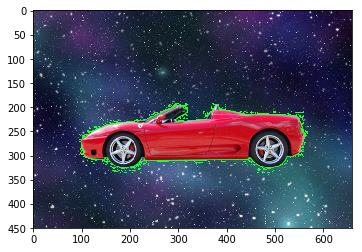

In [30]:
cmplt_image = crop_bg + masked_image
plt.imshow(cmplt_image)